In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/datasets/powerconsumption.csv', parse_dates=['Datetime'], index_col=['Datetime'])
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


In [4]:
df['powerconsumption'] = df[['PowerConsumption_Zone1','PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean(axis=1)
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,powerconsumption
Datetime,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,23475.178480
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,23106.947957
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,22601.073977
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,21829.744030
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,21216.815423
...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,24266.028863
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23661.269287
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,22891.683217


In [5]:
df.sort_values(by='Datetime', ascending=True)
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,powerconsumption
Datetime,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,23475.178480
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,23106.947957
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,22601.073977
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,21829.744030
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,21216.815423
...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,24266.028863
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23661.269287
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,22891.683217


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df.to_numpy())
df = pd.DataFrame(df, columns=[
  'Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'powerconsumption'])
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,powerconsumption
0,-2.106645,0.356277,-0.798900,-0.690797,-0.603085,0.239917,-0.944672,0.363262,-0.046512
1,-2.131578,0.401291,-0.798900,-0.690725,-0.603359,-0.354854,-0.320573,0.346669,-0.110952
2,-2.148946,0.401291,-0.800178,-0.690755,-0.603238,-0.451143,-0.391398,0.276804,-0.199479
3,-2.181962,0.433443,-0.798900,-0.690646,-0.603270,-0.577254,-0.515516,0.160655,-0.334461
4,-2.216353,0.478456,-0.799752,-0.690808,-0.603359,-0.702514,-0.609482,0.091663,-0.441723
...,...,...,...,...,...,...,...,...,...
52411,-2.029092,0.266251,-0.800178,-0.690838,-0.603270,-0.166120,1.117928,-0.461348,0.091886
52412,-2.039925,0.279112,-0.799326,-0.690797,-0.603294,-0.268502,0.977055,-0.514428,-0.013946
52413,-2.048007,0.291973,-0.797623,-0.690672,-0.603447,-0.386242,0.814237,-0.608406,-0.148623
52414,-2.072425,0.304834,-0.800178,-0.690740,-0.603326,-0.474973,0.701680,-0.652784,-0.236824


In [7]:
X = df[['Temperature', 'Humidity', 'WindSpeed', 'powerconsumption']]
X

,Temperature,Humidity,WindSpeed,powerconsumption
0,-2.106645,0.356277,-0.798900,-0.046512
1,-2.131578,0.401291,-0.798900,-0.110952
2,-2.148946,0.401291,-0.800178,-0.199479
3,-2.181962,0.433443,-0.798900,-0.334461
4,-2.216353,0.478456,-0.799752,-0.441723
...,...,...,...,...
52411,-2.029092,0.266251,-0.800178,0.091886
52412,-2.039925,0.279112,-0.799326,-0.013946
52413,-2.048007,0.291973,-0.797623,-0.148623
52414,-2.072425,0.304834,-0.800178,-0.236824


In [8]:
def create_time_windows(data, window_size, step_size):
    windows = []
    targets = []

    for i in range(0, len(data) - window_size, step_size):
        window = data.iloc[i:i + window_size]
        target = data['powerconsumption'].iloc[i + window_size]  # Assuming 'Radiation' is the target variable

        windows.append(window.values)
        targets.append(target)
        

    return windows, targets

X, y = create_time_windows(df, 7, 1)
X, y

([array([[-2.10664461,  0.35627749, -0.7989004 , -0.69079687, -0.60308481,
           0.23991683, -0.94467227,  0.36326195, -0.04651179],
         [-2.13157832,  0.40129059, -0.7989004 , -0.69072501, -0.60335854,
          -0.35485435, -0.3205729 ,  0.3466691 , -0.11095168],
         [-2.14894594,  0.40129059, -0.80017763, -0.69075527, -0.60323777,
          -0.45114252, -0.39139766,  0.27680448, -0.19947902],
         [-2.18196161,  0.4334428 , -0.7989004 , -0.69064559, -0.60326998,
          -0.57725446, -0.5155163 ,  0.16065456, -0.33446083],
         [-2.21635293,  0.4784559 , -0.79975189, -0.69080822, -0.60335854,
          -0.7025143 , -0.60948182,  0.09166326, -0.44172259],
         [-2.22804598,  0.55562121, -0.79975189, -0.69076662, -0.60317337,
          -0.8022109 , -0.69713623,  0.04450464, -0.52800297],
         [-2.26450078,  0.60706476, -0.80017763, -0.69080822, -0.60326998,
          -0.88997799, -0.77847951,  0.01655879, -0.59998483]]),
  array([[-2.13157832,  0.401290

In [9]:
type(y)

list

In [10]:
X = np.array(X)
y = np.array(y)
X, y

(array([[[-2.10664461,  0.35627749, -0.7989004 , ..., -0.94467227,
           0.36326195, -0.04651179],
         [-2.13157832,  0.40129059, -0.7989004 , ..., -0.3205729 ,
           0.3466691 , -0.11095168],
         [-2.14894594,  0.40129059, -0.80017763, ..., -0.39139766,
           0.27680448, -0.19947902],
         ...,
         [-2.21635293,  0.4784559 , -0.79975189, ..., -0.60948182,
           0.09166326, -0.44172259],
         [-2.22804598,  0.55562121, -0.79975189, ..., -0.69713623,
           0.04450464, -0.52800297],
         [-2.26450078,  0.60706476, -0.80017763, ..., -0.77847951,
           0.01655879, -0.59998483]],
 
        [[-2.13157832,  0.40129059, -0.7989004 , ..., -0.3205729 ,
           0.3466691 , -0.11095168],
         [-2.14894594,  0.40129059, -0.80017763, ..., -0.39139766,
           0.27680448, -0.19947902],
         [-2.18196161,  0.4334428 , -0.7989004 , ..., -0.5155163 ,
           0.16065456, -0.33446083],
         ...,
         [-2.22804598,  0.5556212

In [11]:
len(X)

52409

In [12]:
X.shape, y.shape


((52409, 7, 9), (52409,))

In [13]:
X_train = X[:42000]
y_train = y[:42000]
X_test = X[42000:]
y_test = y[42000:]

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(200, activation='tanh', input_shape =(X.shape[1], X.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(150, activation='tanh', return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [15]:
model.compile(optimizer='adam', loss = 'mse')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 200)            168000    
                                                                 
 lstm_1 (LSTM)               (None, 150)               210600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 378751 (1.44 MB)
Trainable params: 378751 (1.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
path = '/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model1.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath =  path, monitor = 'val_loss', save_best_only=True, verbose=1, mode = min)

In [21]:
results = model.fit(X_train, y_train, epochs = 100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[checkpoint])

Epoch 1/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0068
Epoch 1: val_loss improved from inf to 0.00284, saving model to /Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model1.h5
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0068 - val_loss: 0.0028
Epoch 2/100
  17/1050 [..............................] - ETA: 10s - loss: 0.0052

/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1049/1050 [============================>.] - ETA: 0s - loss: 0.0049
Epoch 2: val_loss improved from 0.00284 to 0.00175, saving model to /Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model1.h5
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 3/100
1050/1050 [==============================] - ETA: 0s - loss: 0.0048
Epoch 3: val_loss did not improve from 0.00175
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 4/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0047
Epoch 4: val_loss did not improve from 0.00175
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0047 - val_loss: 0.0023
Epoch 5/100
1049/1050 [============================>.] - ETA: 0s - loss: 0.0044
Epoch 5: val_loss improved from 0.00175 to 0.00165, saving model to /Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/m

In [22]:
y_preds = model.predict(X_test)

326/326 [==============================] - 2s 4ms/step


In [58]:
y_test

array([-0.04666769,  0.09616157,  0.3473332 , ..., -0.14862275,
       -0.23682406, -0.31921799])

In [23]:
test_loss = model.evaluate(X_test, y_test)
print(test_loss)

326/326 [==============================] - 1s 4ms/step - loss: 0.0244
0.024425243958830833


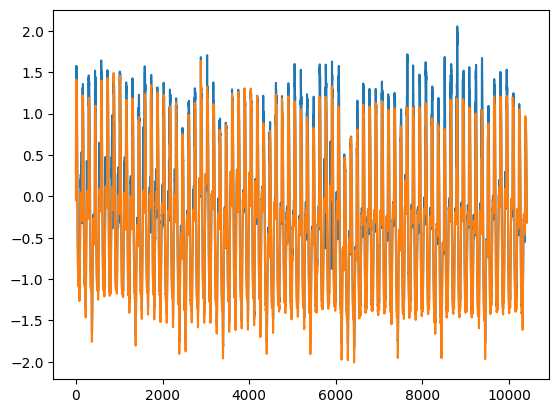

In [24]:
import matplotlib.pyplot as plt
plt.plot(y_preds)
plt.plot(y_test)

In [25]:
path = '/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model2.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath =  path, monitor = 'val_loss', save_best_only=True, verbose=1, mode = min)

In [26]:
results = model.fit(X_train, y_train, epochs = 20, batch_size=32, validation_split=0.2, verbose=1, callbacks=[checkpoint])

Epoch 1/20
1047/1050 [============================>.] - ETA: 0s - loss: 0.0029
Epoch 1: val_loss improved from inf to 0.01005, saving model to /Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model2.h5
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0029 - val_loss: 0.0101
Epoch 2/20
  16/1050 [..............................] - ETA: 12s - loss: 0.0025

/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1046/1050 [============================>.] - ETA: 0s - loss: 0.0030
Epoch 2: val_loss did not improve from 0.01005
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0030 - val_loss: 0.0101
Epoch 3/20
1046/1050 [============================>.] - ETA: 0s - loss: 0.0030
Epoch 3: val_loss improved from 0.01005 to 0.00734, saving model to /Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model2.h5
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0030 - val_loss: 0.0073
Epoch 4/20
1050/1050 [==============================] - ETA: 0s - loss: 0.0030
Epoch 4: val_loss did not improve from 0.00734
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0030 - val_loss: 0.0141
Epoch 5/20
1046/1050 [============================>.] - ETA: 0s - loss: 0.0030
Epoch 5: val_loss did not improve from 0.00734
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0030 - val_loss: 0.0094
Epoch 6/20
1047/10

In [27]:
test_loss = model.evaluate(X_test, y_test)
print(test_loss)

326/326 [==============================] - 2s 5ms/step - loss: 0.0418
0.041811950504779816


In [30]:
loaded_model = tf.keras.models.load_model('/Users/hrishikeshhpillai/Documents/hrishi/deeplearning/gridai/forecasting/checkpoints/model1.h5')
test_loss = loaded_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)


326/326 [==============================] - 1s 3ms/step - loss: 0.0014
Test Loss: 0.0013967438135296106
